<div style="text-align: center; margin: 50px">
<h1 style="color: darkblue; text-align: center;">Qubit by Qubit - Semester 2, HW 17</h1>
<h3>Gates, Measurement, & Circuits Pt. 2</h3>
</div>

## Homework overview 
1. [Solving tensor product by hand](#q1)
2. [Solving tensor products using numpy](#q2)
3. [Unitary gate contruction on Qiskit](#q3)
4. [The Qasm simulator](#q4)

In [1]:
# Import qiskit and call it q for short so we can construct,simulate, and run quantum circuits!
import qiskit as q
# Import Numpy and call it np so we can do maths!
import numpy as np
# Import the python plotting module of matplotlib and call it plt so we can draw graphs!
import matplotlib.pyplot as plt
# Tell matplotlib that we are in an Ipython notebook
%matplotlib inline

<a id="q1"></a>
# Activity 1: Solving tensor product by hand
Tensor products allow us to describe an systems of multiple subsystems, that means we it allows us to describe a two qubit system in terms of the individual qubits.
[Take a look at this page for more info](https://www.quantiki.org/wiki/tensor-product)

First we are going to solve some things by hand:
### 1 a) Solve the following for $|\Psi\rangle$:
$$
    |\Psi \rangle = 
    \begin{bmatrix}
        0 \\
        1
     \end{bmatrix}
     \otimes
      \begin{bmatrix}
        1 \\
        0
     \end{bmatrix}
$$

In [2]:
# replace a,b,c,d with the integer values
Psi = np.array([[0],[0],[1],[0]])

### 1 b) Multiply state $\Psi$ and the matrix to create a new state $|\Phi\rangle$:

$$
    |\Phi\rangle = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
     \end{bmatrix}
     | \Psi \rangle
$$

In [3]:
# replace a,b,c,d with the integer values
Phi = np.array([[0],[0],[0],[1]])

### Review (bonus questions)
Here we created a 2 qubit state and applied our state to a 2 qubit gate. 

**What were the initial states? What were the ending states? What kind of gate is shown above?**

<a id="q2"></a>
# Activity 2: Solving tensor products using numpy

Now that we've got the hang of doing things by hand, let's do it in python!
To perform the tensor product of $a$ and $b$ in python we use `np.kron(a,b)`. Kron is short for the Kronecker product, and advanced maths notation aside they will do the same matrix operation that we need.

[Check out the documentation](https://numpy.org/doc/stable/reference/generated/numpy.kron.html)

Since we have python to do the heavy lifting, let's do what we did earlier but generalise to more qubits:

## Qiskit uses right indexing
Part of qiskit's internal structure means that bit strings are always right indexed, that means $| q_3, q_2, q_1, q_0 \rangle$ is representing the state of qubit 0 to qubit 3 from right to left.

e.g. $|0010\rangle$ means qubit 1 has been flipped

### 2 a) Using  `np.kron(a,b)` print the matrix representing the follwoing:
$$
    |\Psi \rangle = 
    \left(\left(\begin{bmatrix}
        1 \\
        0
     \end{bmatrix}
     \otimes
      \begin{bmatrix}
        1 \\
        0
     \end{bmatrix}\right)
     \otimes
      \begin{bmatrix}
        0 \\
        1
     \end{bmatrix}\right)
     \otimes
      \begin{bmatrix}
        1 \\
        0
     \end{bmatrix}
$$

In [31]:
a = np.array([[1],[0]])
b = np.array([[0],[1]])
psi = np.kron(a,a)
psi = np.kron(psi,b)
psi = np.kron(psi,a)
psi

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

### 2 b) Using these matrix definitions of the CNOT gate and the Identity matrix
$$
    CNOT = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
     \end{bmatrix}
$$

$$
    I = 
    \begin{bmatrix}
        1 & 0\\
        0 & 1
     \end{bmatrix}
$$

###  and  `np.kron(a,b)` print the matrix representing the follwoing:

$$
    U = (I \otimes I) \otimes CNOT
$$

In [11]:
cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
i = np.array([[1,0],[0,1]])
u = np.kron(i,i)
u = np.kron(u,cnot)
u

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

### 2 c) Lastly, using `np.dot(a,b)` find the statevector of $|\Phi\rangle$:

$$
    |\Phi\rangle = U |\Psi\rangle
$$

In [34]:
phi = np.dot(u,psi)
phi

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

<a id="q3"></a>
# Activity 3: Unitary gate contruction in Qiskit

Now that we have created our custom 4 qubit U gate we can pop it into qiskit and simulate!

We need to use two new things:
First we need to use the quantum operator class `q.quantum_info.Operator(U)` this takes a matrix U and makes it a proper operator.
Next we need to make the operator into a gate using `qc.unitary(op, [a,b,c,d], label='U')` this function takes in three variables, `op` which is a quantum operator, `[a,b,c,d]` which is a string containing all the qubits this gate operates over and `label` which gives the gate a name.

In our case we would like our U gate to operate over all 4 qubits:
```
op = q.quantum_info.Operator(U)
qc.unitary(op, [0,1,2,3], label='U')
```

### We are using the statevector simulator and the circuit below which prepares the starting state from question 2:

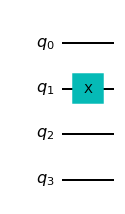

In [26]:
# Statevector simulator use
# This intialises the state described in Question 2
qc = q.QuantumCircuit(4)
qc.x(1)
display(qc.draw(output="mpl"))

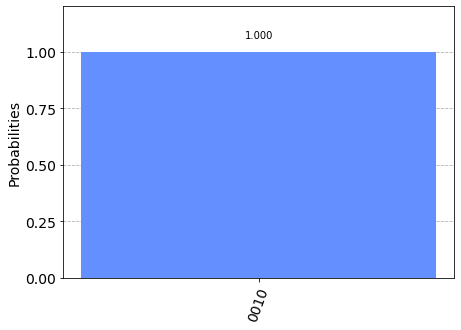

array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [6]:
# Show initial state and statevector 
# (rememeber qiskit writes the statevectors and bit strings backwards - right indexed)
backend = q.Aer.get_backend('statevector_simulator')
job = q.execute(qc, backend)
result = job.result()
out_state = result.get_statevector()
counts = result.get_counts(qc)
graph = q.visualization.plot_histogram(counts)
display(graph)
display(out_state)

### 3 a) Use the operator class as described above to place our custom U gate into the circuit and simulate on the statevector simulator.

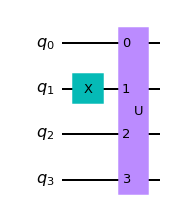

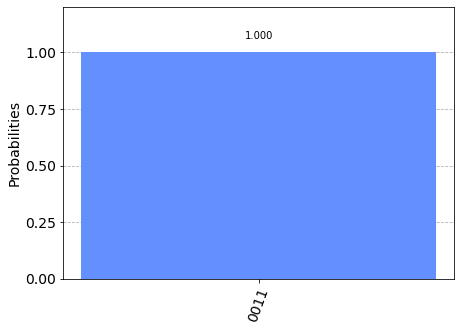

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [27]:
op = q.quantum_info.Operator(u)
qc.unitary(op, [0,1,2,3], label='U')
display(qc.draw(output="mpl"))
backend = q.Aer.get_backend('statevector_simulator')
job = q.execute(qc, backend)
result = job.result()
out_state = result.get_statevector()
counts = result.get_counts(qc)
graph = q.visualization.plot_histogram(counts)
display(graph)
display(out_state)

## Noise and Noise Simulation
Unfortunately, quantum computers are not as perfect as our statevector simulator makes it out to be.

In reality the quantum system is subject to random noise which can cause our quantum states to decohere - we can simulate these more realistic quantum systems using the `qasm_simulator`

The `qasm_simulator` works very similarily to the `statevector_simulator` with two main differences:
1. **The execute command requires a third argument `shots` - this tells the simulator how many times you want to run your circuit. (The more times you run the circuit, the closer you can approximate a perfect system.)**

2. **The circuit must also have a measurement gate placed at the end of each qubit rail, this reads out to classical rails represented collectively as C.**

When using `circ.measure(qubit_list, classical_list)` remember that the `qubit_list` is the list of all qubits that are being read out and the `classical_list` is the list of all classic bits that they are being read out to.

Let's use the $\Phi^+$ Bell state from last week as an example:

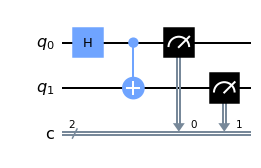

In [7]:
# Initialize a quantum circuit with 2 qubits and 2 classical bits
phi_plus = q.QuantumCircuit(2, 2)
phi_plus.h(0)
phi_plus.cx(0, 1)
phi_plus.measure([0,1], [0,1])
phi_plus.draw(output="mpl")

We can now run the circuit through the simulator with 1000 shots, this should give us a good approximation of the ideal quantum state.

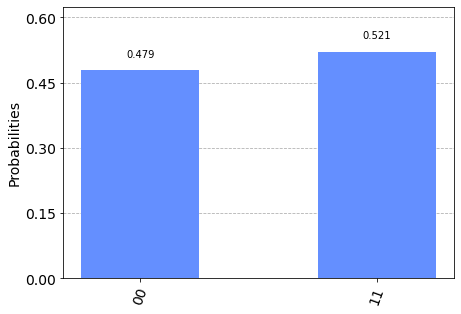

In [8]:
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(phi_plus, simulator, shots=1000)
result = job.result()
counts = result.get_counts(phi_plus)
q.visualization.plot_histogram(counts)

<a id="q4"></a>
# Activity 4: The Qasm simulator

### 4 a) Using the above walkthrough of the `qasm_simulator`, try and simulate the Phi- bell state from the last homework:
$$
| \Phi^- \rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle 
$$

Remember that this circuit must be defined with 2 classical and 2 quantum bits: `q.QuantumCircuit(2,2)`

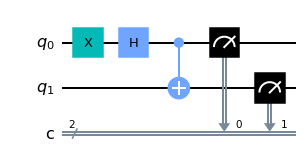

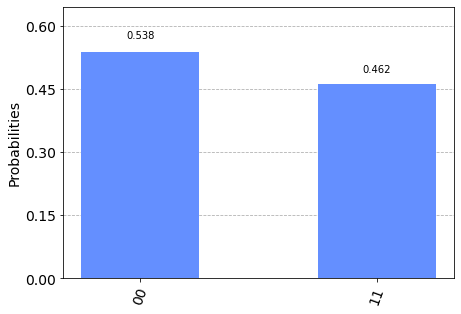

In [29]:
phi_minus = q.QuantumCircuit(2,2)
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.measure([0,1], [0,1])
display(phi_minus.draw(output="mpl"))
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(phi_minus, simulator, shots=1000)
result = job.result()
counts = result.get_counts(phi_minus)
q.visualization.plot_histogram(counts)

### 4b) Now that you're getting used to the noisy simulator, simualte the circuit from question 3 using the noisy simulator.

This circuit should look very similar to the statevector simulator due to no superpositions occuring.

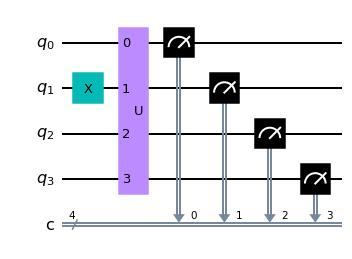

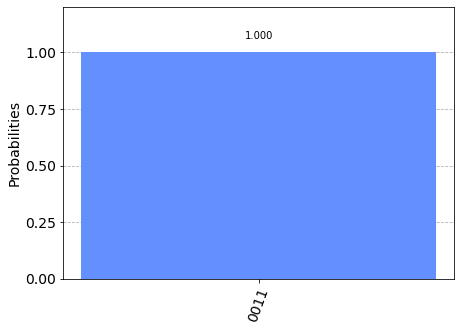

In [30]:
qc_2 = q.QuantumCircuit(4,4)
qc_2.x(1)
op = q.quantum_info.Operator(u)
qc_2.unitary(op, [0,1,2,3], label='U')
qc_2.measure(range(4), range(4))
display(qc_2.draw(output="mpl"))
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(qc_2, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc_2)
q.visualization.plot_histogram(counts)

### © 2020 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*